In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import joblib

In [2]:
data=pd.read_csv("D:\FCI\Machine Learning\Wine Quality\winequality-red.csv")

In [3]:
data['quality']=[1 if y>=7 else 0 for y in data['quality']]

In [4]:
X=data.drop('quality', axis=1)
y=data['quality']

In [5]:
X_res, y_res=SMOTE(random_state=0).fit_resample(X,y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [7]:
'''
pca=PCA(n_components=0.90)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
'''

'\npca=PCA(n_components=0.90)\nX_train=pca.fit_transform(X_train)\nX_test=pca.transform(X_test)\n'

In [8]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2750,7.200000,0.360000,0.460000,2.100000,0.074000,24.000000,44.000000,0.995340,3.400000,0.850000,11.000000
1849,8.528464,0.353238,0.474021,1.955874,0.146339,5.960843,16.000000,0.994080,3.178825,0.752349,12.500000
651,9.800000,0.880000,0.250000,2.500000,0.104000,35.000000,155.000000,1.001000,3.410000,0.670000,11.200000
261,7.000000,0.975000,0.040000,2.000000,0.087000,12.000000,67.000000,0.995650,3.350000,0.600000,9.400000
1253,7.900000,0.660000,0.000000,1.400000,0.096000,6.000000,13.000000,0.995690,3.430000,0.580000,9.500000
...,...,...,...,...,...,...,...,...,...,...,...
1638,8.382916,0.352592,0.305508,1.723417,0.061937,5.297497,15.234168,0.995465,3.328100,0.782150,11.495582
1095,9.400000,0.400000,0.470000,2.500000,0.087000,6.000000,20.000000,0.997720,3.150000,0.500000,10.500000
1130,9.100000,0.600000,0.000000,1.900000,0.058000,5.000000,10.000000,0.997700,3.180000,0.630000,10.400000
1294,8.200000,0.635000,0.100000,2.100000,0.073000,25.000000,60.000000,0.996380,3.290000,0.750000,10.900000


In [9]:
X_train.max()

fixed acidity            15.90000
volatile acidity          1.33000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      68.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
dtype: float64

In [10]:
X_train.shape

(2211, 11)

In [11]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1988,8.989347,0.339794,0.368728,2.132989,0.065766,12.446737,27.553263,0.994994,3.265533,0.790206,12.197937
1216,7.900000,0.570000,0.310000,2.000000,0.079000,10.000000,79.000000,0.996770,3.290000,0.690000,9.500000
1385,8.000000,0.810000,0.250000,3.400000,0.076000,34.000000,85.000000,0.996680,3.190000,0.420000,9.200000
2562,7.817187,0.380573,0.439427,3.786977,0.075646,24.411458,43.177084,0.995324,3.334167,0.817083,11.658333
1334,7.200000,0.835000,0.000000,2.000000,0.166000,4.000000,11.000000,0.996080,3.390000,0.520000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...
2330,8.139398,0.497272,0.276364,5.278786,0.066182,10.484847,19.030306,0.996767,3.373939,0.693031,11.521214
1694,9.475701,0.287477,0.470935,2.271028,0.076047,10.523365,19.953271,0.995928,3.315794,0.691963,11.742991
100,8.300000,0.610000,0.300000,2.100000,0.084000,11.000000,50.000000,0.997200,3.400000,0.610000,10.200000
315,7.100000,0.350000,0.290000,2.500000,0.096000,20.000000,53.000000,0.996200,3.420000,0.650000,11.000000


In [12]:
X_test.shape

(553, 11)

In [13]:
X_test.max()

fixed acidity            15.600000
volatile acidity          1.580000
citric acid               0.760000
residual sugar           13.800000
chlorides                 0.415000
free sulfur dioxide      72.000000
total sulfur dioxide    284.256213
density                   1.003150
pH                        4.010000
sulphates                 1.610000
alcohol                  14.000000
dtype: float64

In [14]:
log=LogisticRegression()
log.fit(X_train, y_train)
y_pred1=log.predict(X_test)

D:\python 3.10.6\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
accuracy_score(y_test, y_pred1)

0.8155515370705244

In [16]:
precision_score(y_test, y_pred1)

0.7836879432624113

In [17]:
recall_score(y_test, y_pred1)

0.8435114503816794

In [18]:
f1_score(y_test, y_pred1)

0.8125

In [19]:
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred2=svm.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred2)

0.72875226039783

In [21]:
precision_score(y_test, y_pred2)

0.6772151898734177

In [22]:
recall_score(y_test, y_pred2)

0.816793893129771

In [23]:
f1_score(y_test, y_pred2)

0.740484429065744

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred3)

0.8571428571428571

In [26]:
precision_score(y_test, y_pred3)

0.7815384615384615

In [27]:
recall_score(y_test, y_pred3)

0.9694656488549618

In [28]:
f1_score(y_test, y_pred3)

0.8654173764906303

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred4)

0.9041591320072333

In [31]:
precision_score(y_test, y_pred4)

0.8718861209964412

In [32]:
recall_score(y_test, y_pred4)

0.9351145038167938

In [33]:
f1_score(y_test, y_pred4)

0.9023941068139963

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred5 = rf.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred5)

0.9330922242314648

In [36]:
precision_score(y_test, y_pred5)

0.89198606271777

In [37]:
recall_score(y_test, y_pred5)

0.9770992366412213

In [38]:
f1_score(y_test, y_pred5)

0.9326047358834243

In [39]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred6 = gbc.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred6)

0.891500904159132

In [41]:
precision_score(y_test, y_pred6)

0.8458904109589042

In [42]:
recall_score(y_test, y_pred6)

0.9427480916030534

In [43]:
f1_score(y_test, y_pred6)

0.8916967509025271

# Visualizing Results

In [44]:
Final_Results = pd.DataFrame({'Models':['Logestic Regression', 'Support Vector Classifier', 'K-nearest Neighbor', 'Decision Tree', 'Random Forest', 'Gradient Boosting Classifier'],
                              'Accuracy':[accuracy_score(y_test, y_pred1)*100,
                                         accuracy_score(y_test, y_pred2)*100,
                                         accuracy_score(y_test, y_pred3)*100,
                                         accuracy_score(y_test, y_pred4)*100,
                                         accuracy_score(y_test, y_pred5)*100,
                                         accuracy_score(y_test, y_pred6)*100]
                             })

In [45]:
Final_Results

,Models,Accuracy
0,Logestic Regression,81.555154
1,Support Vector Classifier,72.875226
2,K-nearest Neighbor,85.714286
3,Decision Tree,90.415913
4,Random Forest,93.309222
5,Gradient Boosting Classifier,89.150090


D:\python 3.10.6\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

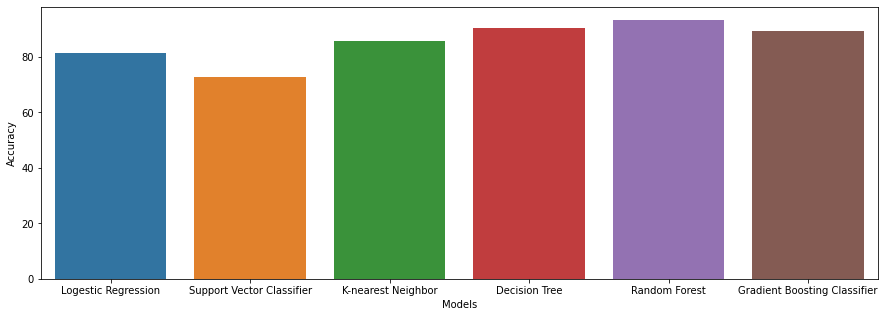

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(Final_Results['Models'], Final_Results['Accuracy'])